# Import Scikit Learn, Pandas and Numpy

In [1]:
import sklearn
import numpy as np
import pandas as pd

# 1. Read the Dataset using Pandas

In [2]:
data = pd.read_csv("amazon_baby.csv")

In [3]:
data

name  \
0                                Planetwise Flannel Wipes   
1                                   Planetwise Wipe Pouch   
2                     Annas Dream Full Quilt with 2 Shams   
3       Stop Pacifier Sucking without tears with Thumb...   
4       Stop Pacifier Sucking without tears with Thumb...   
...                                                   ...   
183526  Baby Teething Necklace for Mom Pretty Donut Sh...   
183527  Baby Teething Necklace for Mom Pretty Donut Sh...   
183528   Abstract 2 PK Baby / Toddler Training Cup (Pink)   
183529  Baby Food Freezer Tray - Bacteria Resistant, B...   
183530  Best 2 Pack Baby Car Shade for Kids - Window S...   

                                                   review  rating  
0       These flannel wipes are OK, but in my opinion ...       3  
1       it came early and was not disappointed. i love...       5  
2       Very soft and comfortable and warmer than it l...       5  
3       This is a product well worth the purchase.  I ...       5  
4       All of my kids have cried non-stop when I trie...       5  
...                                                   ...     ...  
183526  Such a great idea! very handy to have and look...       5  
183527  This product rocks!  It is a great blend of fu...       5  
183528  This item looks great and cool for my kids.......       5  
183529  I am extremely happy with this product. I have...       5  
183530  I love this product very mush . I have bought ...       5  

[183531 rows x 3 columns]

# 2. Exploratory Data Analysis

In [4]:
data.head()

name  \
0                           Planetwise Flannel Wipes   
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  
0  These flannel wipes are OK, but in my opinion ...       3  
1  it came early and was not disappointed. i love...       5  
2  Very soft and comfortable and warmer than it l...       5  
3  This is a product well worth the purchase.  I ...       5  
4  All of my kids have cried non-stop when I trie...       5

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


### The first observation is that we have cells with null review and they have rating. Those rows which contain those cells should be dropped from the data as they will confuse the model by acting like noise.

In [6]:
data.describe()

rating
count  183531.000000
mean        4.120448
std         1.285017
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000

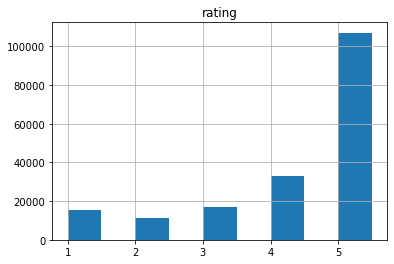

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
plt.show()

### The second observation is that we have imbalanced classes in our Data. At this project we will just use different metrics to measure model performance besides accuracy like recall, $F_{1}$ score and ROC.

# 3. Data Preprocessing
### Drop null rows using DataFrame.dropna()

In [8]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182384 entries, 0 to 182383
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    182384 non-null  object
 1   review  182384 non-null  object
 2   rating  182384 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


### Ignore the three stars ratings.

Because they are neutral, and dropp those rows with neutral reviews.
This step is done before building the word count vector to save memory space and computational power by not getting the word count vector for those neutral reviews.

In [9]:
data = data[data['rating'] != 3]
data.reset_index(drop=True, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165679 entries, 0 to 165678
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    165679 non-null  object
 1   review  165679 non-null  object
 2   rating  165679 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


### Build word count vectors

In [11]:
import pandas as pd
import numpy as np    
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(
    analyzer = "word",  
    token_pattern = '[a-zA-Z0-9$&+:;=?@#|<>.^*()%!]+')

dicts = []
for i in range(data.shape[0]):
    texts= [data.loc[i]['review']]
    cv_fit=cv.fit_transform(texts)    
    word_list = cv.get_feature_names();    
    count_list = cv_fit.toarray().sum(axis=0)
    dictionary = dict(zip(word_list,count_list))
    dicts.append(dictionary)

In [14]:
data = data.assign(word_count=dicts)
data = data.assign(sentiment = (data['rating'] >= 4).astype(int))
data.head()

name  \
0                              Planetwise Wipe Pouch   
1                Annas Dream Full Quilt with 2 Shams   
2  Stop Pacifier Sucking without tears with Thumb...   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  \
0  it came early and was not disappointed. i love...       5   
1  Very soft and comfortable and warmer than it l...       5   
2  This is a product well worth the purchase.  I ...       5   
3  All of my kids have cried non-stop when I trie...       5   
4  When the Binky Fairy came to our house, we did...       5   

                                          word_count  sentiment  
0  {'and': 3, 'bags': 1, 'came': 1, 'disappointed...          1  
1  {'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...          1  
2  {'a': 2, 'about': 1, 'and': 3, 'anything': 1, ...          1  
3  {'a': 2, 'all': 2, 'allow': 1, 'an': 1, 'and':...          1  
4  {'a': 2, 'about': 2, 'adorable': 1, 'and': 2, ...          1

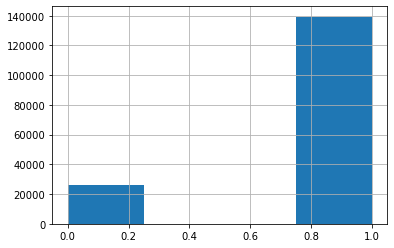

In [15]:
data['sentiment'].hist(bins=4)
plt.show()

# 4. Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# 5. Logistic Regression Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

pipeline = Pipeline(
    [
        ('Count_Vectorizer', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Logistic_Regression', LogisticRegression(solver='lbfgs', max_iter=1000))
    ],
    verbose=True
)

from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('Count_Vectorizer', CountVectorizer()),
                ('TF-IDF', TfidfTransformer()),
                ('Logistic_Regression', LogisticRegression(max_iter=1000))],
         verbose=True)

# 6. Pipeline Training

In [18]:
pipeline.fit(train_set['review'], train_set['sentiment'])

[Pipeline] .. (step 1 of 3) Processing Count_Vectorizer, total=   7.5s
[Pipeline] ............ (step 2 of 3) Processing TF-IDF, total=   0.5s
[Pipeline]  (step 3 of 3) Processing Logistic_Regression, total=  10.1s


Pipeline(steps=[('Count_Vectorizer', CountVectorizer()),
                ('TF-IDF', TfidfTransformer()),
                ('Logistic_Regression', LogisticRegression(max_iter=1000))],
         verbose=True)

# 7. Metrics

In [19]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(test_set['review'])
print('Classification report:\n\n{}'.format(
    classification_report(test_set['sentiment'], y_pred))
)

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      5338
           1       0.95      0.98      0.96     27798

    accuracy                           0.94     33136
   macro avg       0.91      0.84      0.87     33136
weighted avg       0.93      0.94      0.93     33136



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.94')

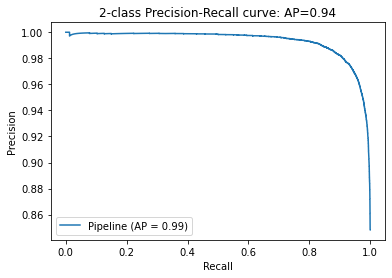

In [27]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(test_set['sentiment'], y_pred)
disp = plot_precision_recall_curve(pipeline, test_set['review'], test_set['sentiment'])

disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

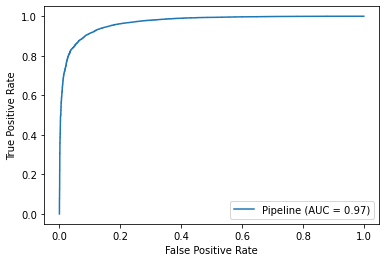

In [31]:
disp = plot_roc_curve(pipeline, test_set['review'], test_set['sentiment'])